In [2]:

'''
【阿里云Apsara Clouder认证】Python数据科学分析实战_足球运动员特征分析

项目要求：
1. 查看数据基本信息：缺失值、异常值、重复值等
2. 查看运动员的身高，体重，评分信息分布
3. 查看左脚与右脚选手在数量上的偏差
4. 从球员平均评分上考虑，拥有top10评分能力的俱乐部/国家
5. 哪些俱乐部拥有更多忠心的球员（5年及以上）
6. 足球运动员是否与出生月份相关
7. 足球运动员的号码是否与位置相关
8. 身高与体重是否具有相关性
9. 哪些指标对评分的影响较大
10. 假设我们不清楚后两列的具体含义是什么，分析该标题可能的含义
11. 年龄与评分具有怎样的关系
'''

'\n【阿里云Apsara Clouder认证】Python数据科学分析实战_足球运动员特征分析\n\n项目要求：\n1. 查看数据基本信息：缺失值、异常值、重复值等\n2. 查看运动员的身高，体重，评分信息分布\n3. 查看左脚与右脚选手在数量上的偏差\n4. 从球员平均评分上考虑，拥有top10评分能力的俱乐部/国家\n5. 哪些俱乐部拥有更多忠心的球员（5年及以上）\n6. 足球运动员是否与出生月份相关\n7. 足球运动员的号码是否与位置相关\n8. 身高与体重是否具有相关性\n9. 哪些指标对评分的影响较大\n10. 假设我们不清楚后两列的具体含义是什么，分析该标题可能的含义\n11. 年龄与评分具有怎样的关系\n'

In [24]:
# 导入分析需要用到的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
import warnings
warnings.filterwarnings('ignore')


In [25]:
# 加载数据集
player = pd.read_csv(r"FullData.csv")
# 设置展示的最大列数
pd.set_option("max_columns", 100)
player.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [26]:
# 对数据集进行简单的处理查看
# 通过info方法查看缺失信息。(以及每列的类型信息)
# player.info()
player = player[player["Club_Position"].notnull()]
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17587 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17587 non-null object
Nationality           17587 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17587 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17587 non-null int64
Height                17587 non-null object
Weight                17587 non-null object
Preffered_Foot        17587 non-null object
Birth_Date            17587 non-null object
Age                   17587 non-null int64
Preffered_Position    17587 non-null object
Work_Rate             17587 non-null object
Weak_foot             17587 non-null int64
Skill_Moves           17587 non-null int64
Ball_Control          17587 non-null int64
Dribbling      

In [27]:
# 查看是否含有异常值。
player.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000
mean,12.219535,21.294536,2018.899414,66.165349,25.459544,2.934042,2.303122,57.971513,54.801785,44.231592,45.566441,47.441974,55.918804,61.769546,49.590266,46.794337,52.706545,55.851766,49.740092,58.119691,52.395633,65.287940,65.483937,63.477000,65.084665,64.009268,63.206744,64.917894,52.391255,55.579519,45.155513,47.401376,47.179394,43.381134,49.163757,43.273725,16.610223,16.823449,16.458805,16.560130,16.901348
std,6.933187,19.163741,1.698787,7.082330,4.679237,0.655896,0.746159,16.834438,18.913841,21.561664,21.515428,21.828125,17.445015,9.274455,19.406193,20.495265,14.588804,13.485148,18.458043,14.983002,15.616409,14.436703,14.101011,15.477813,12.532353,13.720545,14.618579,11.430826,17.472470,17.599257,19.372987,19.210956,18.463458,17.699756,15.870012,17.709623,17.140204,17.798483,16.601091,16.967686,18.034984
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,7.000000,11.000000,11.000000,10.000000,20.000000,10.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


In [28]:
# 检查是否包含重复值
# player.duplicated().any()
# 如果有重复值，我们可以这样去除重复值。
# player.drop_duplicates(inplace=True)

In [29]:
# player.head()
player["Height"] = player["Height"].map(lambda x: int(x.replace("cm", "")))
player["Weight"] = player["Weight"].map(lambda x: int(x.replace("kg", "")))
# player["Height"] = player["Height"].str.replace("cm", "").astype(np.int)
# player["Weight"] = player["Weight"].str.replace("cm", "").astype(np.int)

In [30]:
# player.info()

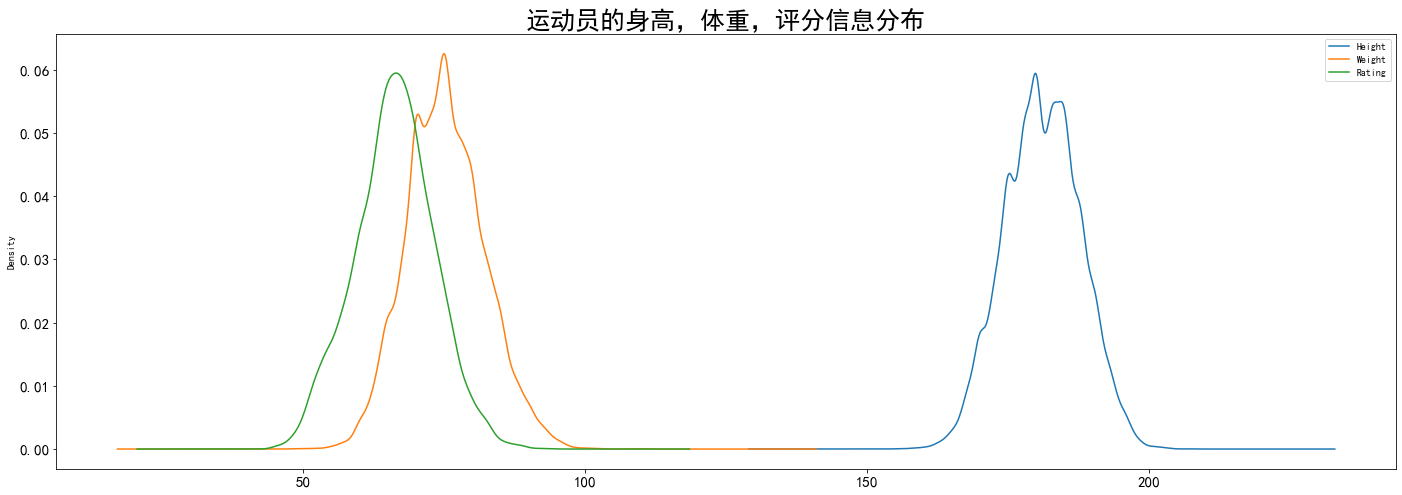

In [31]:
# 运动员的身高，体重，评分信息分布。
fig = player[["Height", "Weight", "Rating"]].plot(kind="kde",
                                                  figsize = (24,8),
                                                  title = '运动员的身高，体重，评分信息分布')
fig.axes.title.set_size(25)
plt.tick_params(labelsize=15)

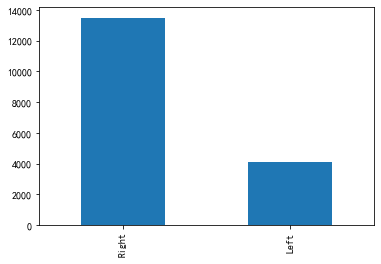

In [32]:
# 左脚与右脚选手在数量上的偏差。
# player["Preffered_Foot"].value_counts()
# 画图展示
player["Preffered_Foot"].value_counts().plot(kind="bar")

In [33]:
# 从球员平均评分上考虑，拥有top10评分能力的俱乐部/ 国家。【超过20人】

# 从俱乐部的角度分析
# s = player.groupby("Club")["Rating"].agg(["count", "sum", "mean"])
# s = s[s["count"] > 20]
# s.sort_values("count", ascending=False)
# s.sort_values("mean", ascending=False)
# 从国家的角度分析
s = player.groupby("Nationality")["Rating"].agg(["count", "sum", "mean"])
s = s[s["count"] > 20]
s.sort_values("mean", ascending=False).head(10)

,count,sum,mean
Nationality,,,
Algeria,50,3581,71.620000
Czech Republic,57,4047,71.000000
Ecuador,34,2406,70.764706
Portugal,360,25329,70.358333
Morocco,74,5203,70.310811
Paraguay,75,5273,70.306667
Spain,1008,70859,70.296627
Brazil,921,64492,70.023887
Serbia,136,9482,69.720588


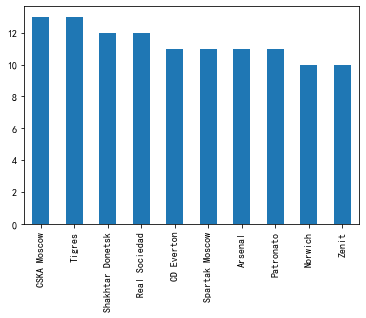

In [34]:
# 哪个俱乐部拥有更多忠心的球员（5年及以上）

# 获取加入俱乐部的年份
year = player["Club_Joining"].map(lambda x: str(x).split("/")[-1])
# 目前，这个年份还是字符串类型的，我们需要转换为数值（整数）类型
year = year.astype(np.int)
t = player[(2017 - year >= 5) & (player["Club"] != "Free Agents")]
t["Club"].value_counts().head(10).plot(kind="bar")

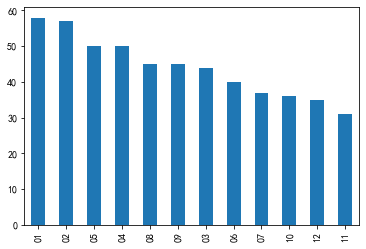

In [35]:
# 足球运动员是否与出生月份相关？
# 1 全体运动员
# 2 知名运动员（80分及以上）


t = player[player["Rating"] >=80]
t = t["Birth_Date"].str.split("/", expand=True)
# 全体运动员
# t = player["Birth_Date"].str.split("/", expand=True)
t[0].value_counts().plot(kind="bar")

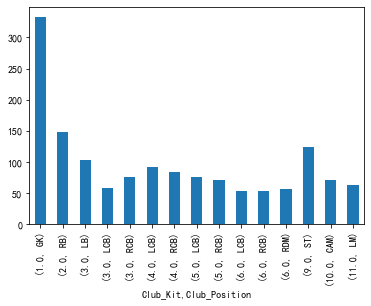

In [36]:
# 足球运动员的号码是否与位置相关。
# 去除替补球员与后备队球员。
t = player[(player["Club_Position"] != "Sub") & (player["Club_Position"] != "Res")]
x = t.groupby(["Club_Kit", "Club_Position"]).size()
x[x > 50].plot(kind="bar")

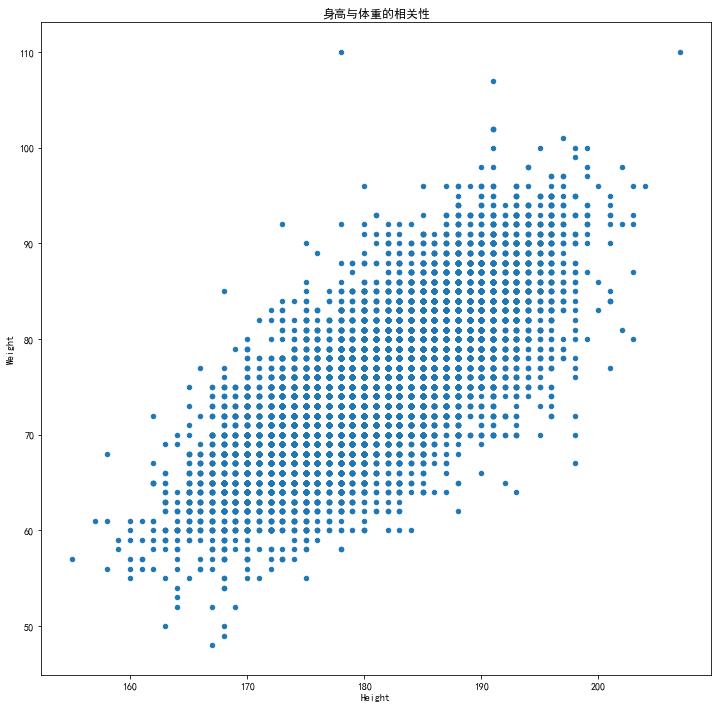

In [37]:
# 身高与体重是否具有相关性？
player.plot.scatter(x="Height", y="Weight",figsize = (12,12),title = '身高与体重的相关性')


In [20]:
# 哪些指标对评分的影响较大？
# 查看player的相关系数。
player.corr()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
National_Kit,1.000000,0.055408,-0.027211,-0.084289,-0.101229,-0.093795,-0.103583,0.027268,0.105903,0.046644,0.093836,-0.162083,-0.152251,-0.148329,-0.073288,-0.058696,0.124641,-0.154804,0.076988,-0.016093,0.045986,0.036071,-0.006230,0.079866,0.056282,0.003828,-0.099086,0.089038,0.085691,-0.100935,-0.072020,0.083610,0.138914,0.109168,0.081888,0.106621,0.095289,0.117381,-0.031492,-0.012435,-0.015472,-0.024611,-0.018816
Club_Kit,0.055408,1.000000,0.077060,-0.172710,-0.028711,-0.072341,-0.198230,-0.037234,0.006378,-0.071067,-0.028584,-0.105522,-0.094920,-0.104446,-0.121709,-0.148887,-0.031746,-0.125007,-0.071177,-0.117220,-0.067383,-0.085123,-0.100525,-0.006315,-0.010092,-0.101258,-0.141140,0.010762,-0.036128,-0.106797,-0.076264,-0.051829,-0.007898,-0.040658,-0.053631,-0.062077,-0.016220,-0.020482,0.004684,0.011290,0.008788,0.006725,0.007480
Contract_Expiry,-0.027211,0.077060,1.000000,0.047430,-0.080641,-0.053049,-0.118370,0.004865,0.044511,0.035324,0.048664,0.015409,0.011482,0.008307,-0.010361,0.051309,0.043698,0.006995,0.028113,0.005840,0.012553,0.034513,0.016371,0.071003,0.079394,0.053830,-0.012495,0.046095,0.047667,0.002805,0.026235,0.021477,0.032341,0.028781,0.010840,0.007001,0.020878,0.025120,-0.027994,-0.026117,-0.023273,-0.023064,-0.024923
Rating,-0.084289,-0.172710,0.047430,1.000000,0.046937,0.139703,0.458098,0.226263,0.251926,0.463211,0.368565,0.236843,0.215385,0.249156,0.404422,0.828329,0.354501,0.319504,0.489277,0.613612,0.401851,0.496239,0.483217,0.206392,0.224253,0.355335,0.369045,0.087811,0.283309,0.289840,0.343265,0.441773,0.328576,0.419517,0.420796,0.399575,0.339898,0.386494,-0.018586,-0.027615,-0.031696,-0.021343,-0.022978
Height,-0.101229,-0.028711,-0.080641,0.046937,1.000000,0.758208,0.076727,-0.180431,-0.431177,-0.402596,-0.483545,-0.042485,-0.069602,-0.054282,-0.049009,-0.016407,-0.419544,-0.050358,-0.359610,-0.169460,-0.471327,-0.356768,-0.323575,-0.521688,-0.451128,-0.293564,0.537223,-0.799775,-0.611198,-0.063048,0.005367,-0.273413,-0.347154,-0.364182,-0.423115,-0.380217,-0.321246,-0.333576,0.358795,0.357683,0.356070,0.359746,0.360260
Weight,-0.093795,-0.072341,-0.053049,0.139703,0.758208,1.000000,0.223432,-0.135402,-0.375163,-0.338460,-0.412959,-0.030512,-0.062312,-0.047097,0.017366,0.079019,-0.344840,-0.028947,-0.283098,-0.083541,-0.389293,-0.299264,-0.261611,-0.465558,-0.404240,-0.241365,0.613829,-0.680791,-0.535404,0.005842,0.019235,-0.188739,-0.281775,-0.274446,-0.343380,-0.293956,-0.246189,-0.258932,0.342502,0.340775,0.339505,0.341829,0.341785
Age,-0.103583,-0.198230,-0.118370,0.458098,0.076727,0.223432,1.000000,0.086137,-0.016088,0.082875,0.004575,0.131425,0.096679,0.116847,0.259413,0.456724,0.073873,0.192667,0.189982,0.355588,0.134576,0.127537,0.179109,-0.175966,-0.168440,0.070685,0.329289,-0.100131,-0.019459,0.168694,0.137785,0.151174,0.064487,0.149635,0.139101,0.195338,0.131469,0.133950,0.122371,0.105158,0.109931,0.113216,0.106979
Weak_foot,0.027268,-0.037234,0.004865,0.226263,-0.180431,-0.135402,0.086137,1.000000,0.336905,0.367420,0.363398,0.026950,0.025865,0.043656,0.134120,0.207098,0.354699,0.058148,0.352235,0.316486,0.324117,0.338919,0.298103,0.257156,0.240919,0.228619,-0.004841,0.253466,0.306049,0.064655,0.190847,0.334897,0.361983,0.365637,0.359044,0.345745,0.340757,0.366610,-0.232109,-0.236372,-0.230924,-0.233080,-0.235275
Skill_Moves,0.105903,0.006378,0.044511,0.251926,-0.431177,-0.375163,-0.016088,0.336905,1.000000,0.727123,0.762623,0.032811,0.043037,0.070841,0.230424,0.223236,0.719577,0.067407,0.591623,0.490854,0.644761,0.628088,0.515631,0.619623

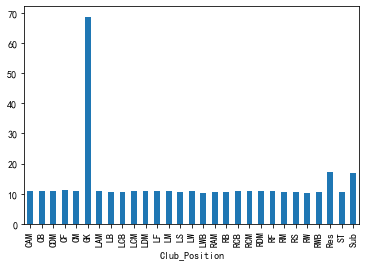

In [38]:
# 假设我们不清楚后两列的具体含义是什么，分析该标题可能的含义？
# player.info()
# 对位置进行分组
g = player.groupby("Club_Position")
g["GK_Positioning"].agg("mean").plot(kind="bar")

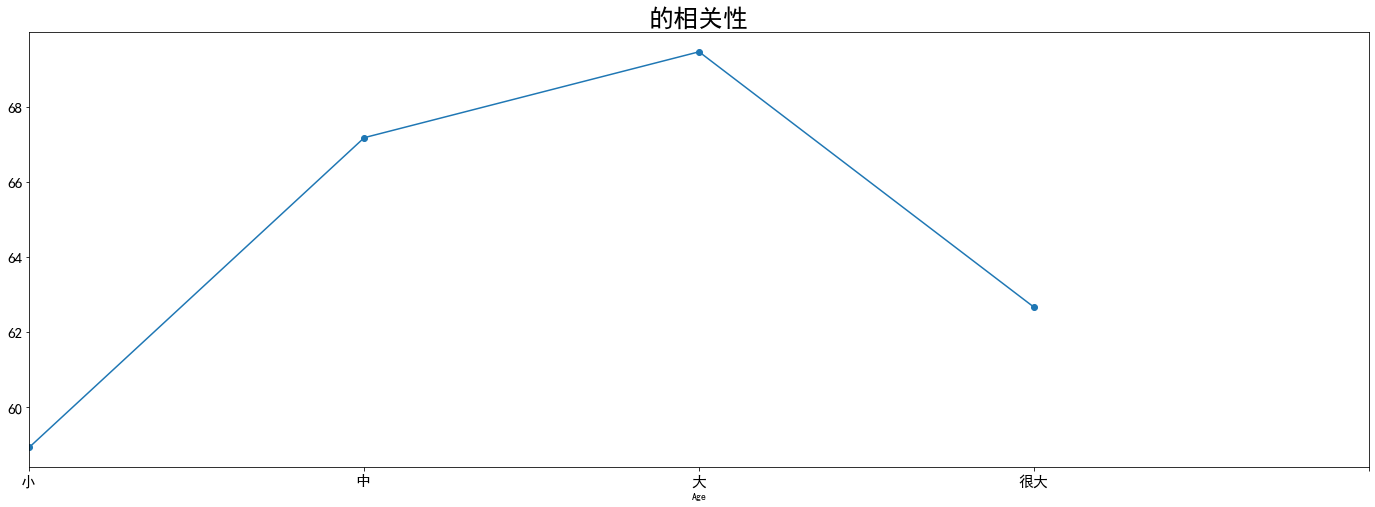

In [39]:
# 年龄与评分具有怎样的关系？
t = player[["Age", "Rating"]]
t["Age"] = pd.cut(player["Age"], bins=[0, 20, 30, 40, 100], labels=["小", "中", "大", "很大"])
fig = t.groupby("Age")["Rating"].mean().plot(kind="line", 
                                       xticks=[0, 1, 2, 3, 4], 
                                       marker="o",
                                       title = '的相关性', 
                                       figsize = (24,8))
fig.axes.title.set_size(25)
plt.tick_params(labelsize=15)